In [34]:
import numpy as np
import qutip
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
from matplotlib import ticker
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

plt.rcParams.update({'font.size': 20, 'font.family': 'serif'})
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.linewidth'] = 2

def load_data(path_to_file):

    """ This function load the data for the plot.
    'path_to_file' is set such that it starts from 'results/data' """
    data = np.load(f'results/data/{path_to_file}', allow_pickle=True)
    return data

In [3]:
data = np.load('results/data/back_action/' \
'x/Qinp/QRC/qubit/L9_Js1_h3_W0.01_dt5_V10_D1_Nrep1_MeasStr_0.1' \
'/Iter_0.npz', allow_pickle=True)

In [4]:
data['obs'].shape

(4000, 450)

In [5]:
import qutip

def plot_single_axis_dependence_gsweep(L=9, h=10, W=0.01, Vmp=1, Dmp=1, N_rep=1, dt=10, Js=1, inp_type='qubit',
								axis1='x', legend=True, N_meas=None, MeasStr=0.1):
	fig, axes = plt.subplots(1, 3, figsize=(16, 8), sharey=True)  # 1 row, 3 cols
	dic ={
	'z': qutip.sigmaz(),
	'x': qutip.sigmax(),
	'y': qutip.sigmay(),
	}
	colors = ['chocolate', 'C0', 'mediumvioletred']
	markers = ['s', 'o', 'p']

	if N_meas is None:
		N_meas = 'Inf'

	for p, g in enumerate(MeasStr):
		ax = axes[p]

		path = f'back_action/x/Qinp/QPreprocess/{inp_type}/N_meas{N_meas}/Capacity_L{L}_Js{Js}_V{Vmp}_D{Dmp}_Nrep{N_rep}_h{h}_W{W}_dt{dt}_ax_{axis1}_sweep_delay_MeasStr{g}.npz'
		data = load_data(path)

		delays = data['delays']
		
		for idx2,axis2 in enumerate(['x', 'y', 'z']):
			C_mean = data[f'C_mean {axis2}']
			C_std = data[f'C_std {axis2}']

			lab = fr'$\langle \sigma_1^{{{axis2}}} \rangle$' if p == 0 else ''

			ax.plot(
				delays,
				C_mean,
				marker=markers[idx2],
				markersize=18,
				label=lab,
				color=colors[idx2],
				markeredgecolor='black',
				markeredgewidth=1.5
			)
			ax.fill_between(delays, C_mean - C_std, C_mean + C_std, alpha=0.2, color=colors[idx2])

		# ax.set_title(f"{axis1}-axis measurement")
		ax.set_xlabel(r'$\tau_{{QRC}}$')
		ax.text(0.15, 0.15, f'g = {g}', transform=ax.transAxes)

	for ax in axes:
		ax.set_xlim(-0.1,7)
	axes[0].set_ylabel('C')
	if legend:
		fig.legend(loc='lower center', ncol=3, frameon=False)
		fig.tight_layout()
		fig.subplots_adjust(bottom=0.25)

	plt.show()

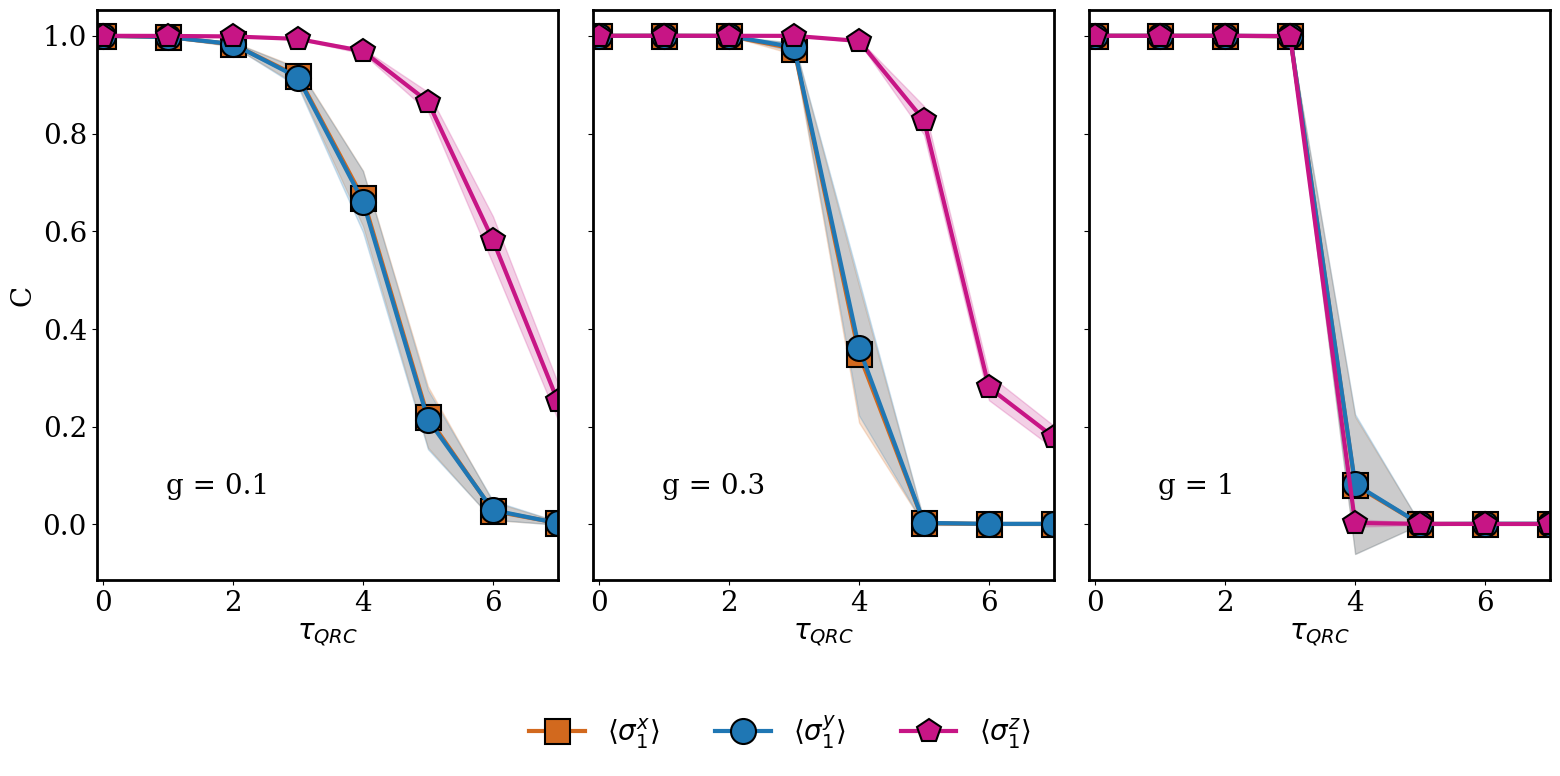

In [6]:
plot_single_axis_dependence_gsweep(L=9, h=3, W=0.01, Vmp=10, Dmp=1, N_rep=1, dt=5, Js=1, legend=True, N_meas=None, MeasStr=[0.1, 0.3, 1])

In [7]:
import qutip

def plot_single_axis_dependence_Nmeas_sweep(L=9, h=10, W=0.01, Vmp=1, Dmp=1, N_rep=1, dt=10, Js=1, inp_type='qubit',
								axis1='x', legend=True, N_meas=None, MeasStr=0.1):
	fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=True)  # 1 row, 3 cols
	dic ={
	'z': qutip.sigmaz(),
	'x': qutip.sigmax(),
	'y': qutip.sigmay(),
	}
	colors = ['chocolate', 'C0', 'mediumvioletred']
	markers = ['s', 'o', 'p']

	if N_meas is None:
		N_meas = 'Inf'

	for p, g in enumerate(N_meas):
		ax = axes[p]
		if g is None:
			g = 'Inf'

		path = f'back_action/{axis1}/Qinp/QPreprocess/{inp_type}/N_meas{g}/Capacity_L{L}_Js{Js}_V{Vmp}_D{Dmp}_Nrep{N_rep}_h{h}_W{W}_dt{dt}_ax_{axis1}_sweep_delay_MeasStr{MeasStr}.npz'
		data = load_data(path)

		delays = data['delays']
		
		for idx2,axis2 in enumerate(['x', 'y', 'z']):
			C_mean = data[f'C_mean {axis2}']
			C_std = data[f'C_std {axis2}']

			lab = fr'$\langle \sigma_1^{{{axis2}}} \rangle$' if p == 0 else ''

			ax.plot(
				delays,
				C_mean,
				marker=markers[idx2],
				markersize=18,
				label=lab,
				color=colors[idx2],
				markeredgecolor='black',
				markeredgewidth=1.5
			)
			ax.fill_between(delays, C_mean - C_std, C_mean + C_std, alpha=0.2, color=colors[idx2])

		ax.set_xlabel(r'$\tau_{{QRC}}$')
		text = fr'$N_{{meas}} = 10^{{{int(np.log10(g))}}}$' if g != 'Inf' else fr'$N_{{meas}} = \infty$'
		loc1 = 0.15 if g > 1e10 and MeasStr == 0.1 else 0.55
		loc2 = 0.15 if g > 1e10 and MeasStr == 0.1 else 0.75
		ax.text(loc1, loc2, text, transform=ax.transAxes, backgroundcolor='white')

	for ax in axes:
		ax.set_xlim(-0.1,7)
		# ax.set_yscale('log')
	axes[0].set_ylabel('C')
	if legend:
		fig.suptitle(f'Measurement strength = {MeasStr}', fontsize=20)
		fig.legend(loc='lower center', ncol=3, frameon=False)
		fig.tight_layout()
		fig.subplots_adjust(bottom=0.25)
		fig.subplots_adjust(top=0.9)

	plt.show()

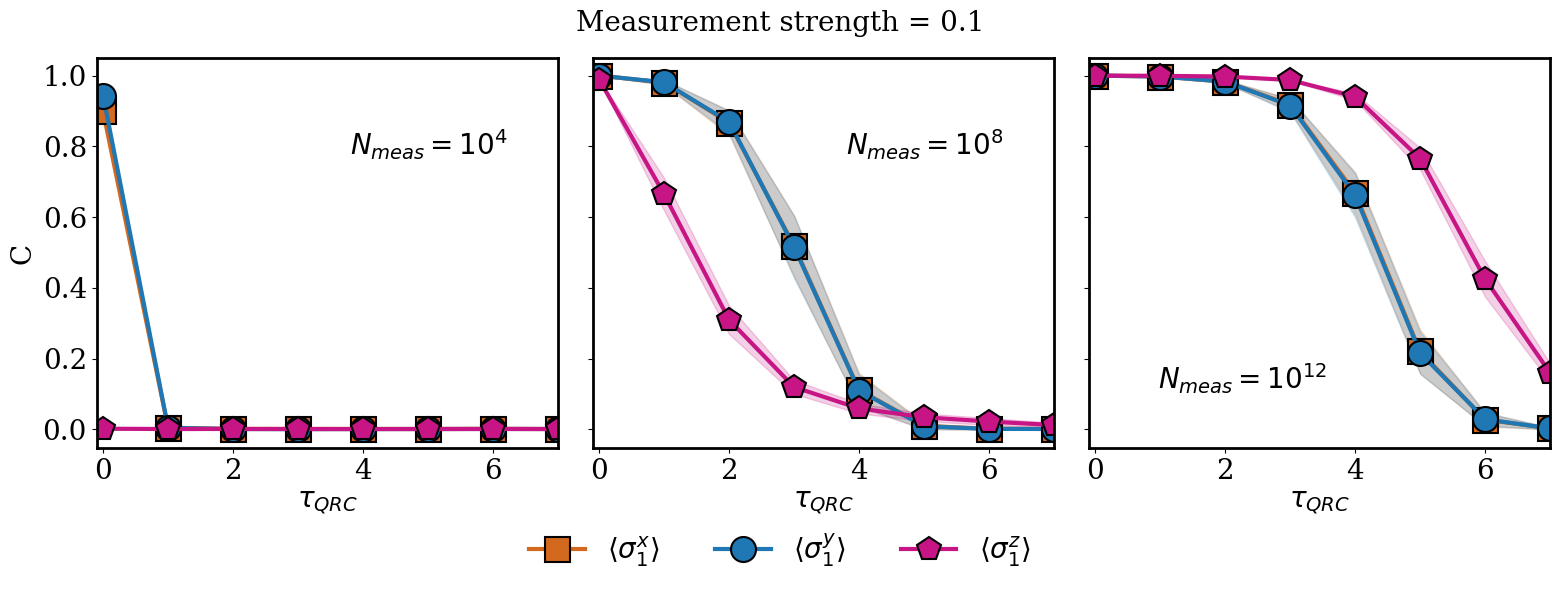

In [8]:
plot_single_axis_dependence_Nmeas_sweep(L=9, h=3, W=0.01, Vmp=10, Dmp=1, N_rep=1, dt=5, Js=1, legend=True, N_meas=[int(1e4), int(1e8), int(1e12)], MeasStr=0.1)

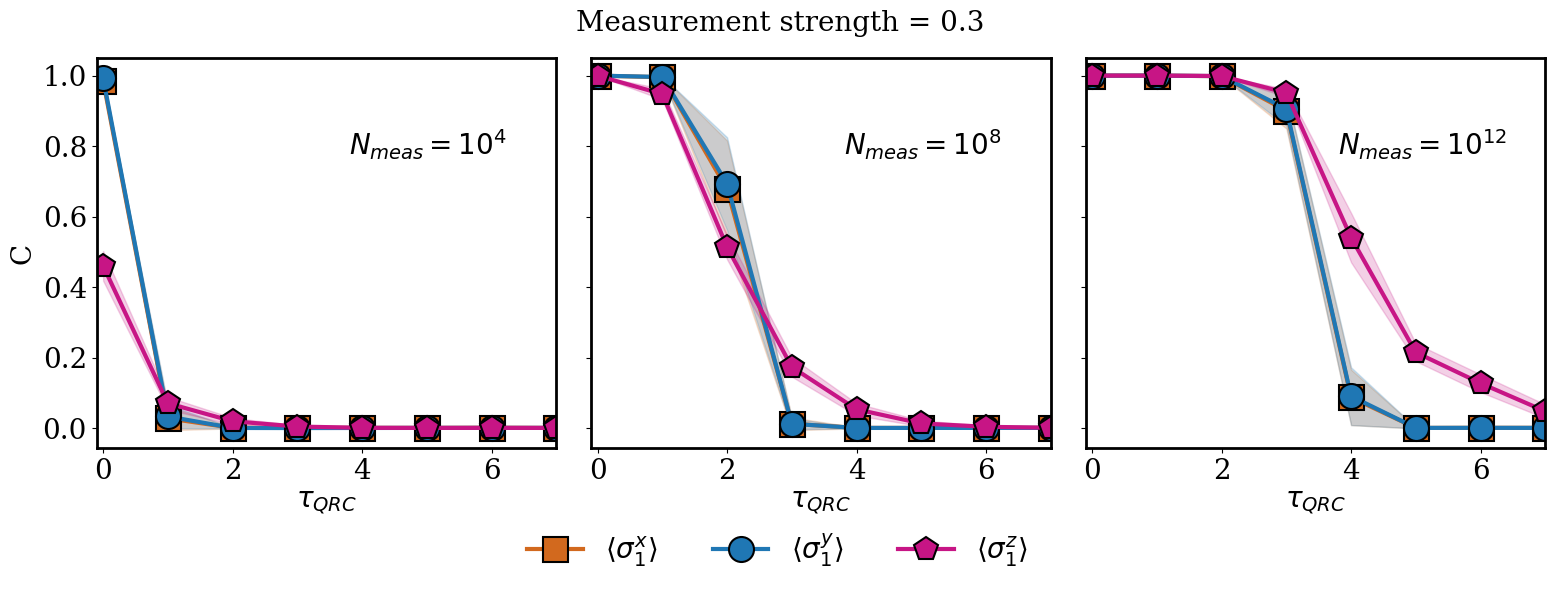

In [9]:
plot_single_axis_dependence_Nmeas_sweep(L=9, h=3, W=0.01, Vmp=10, Dmp=1, N_rep=1, dt=5, Js=1, legend=True, N_meas=[int(1e4), int(1e8), int(1e12)], MeasStr=0.3, axis1='x')

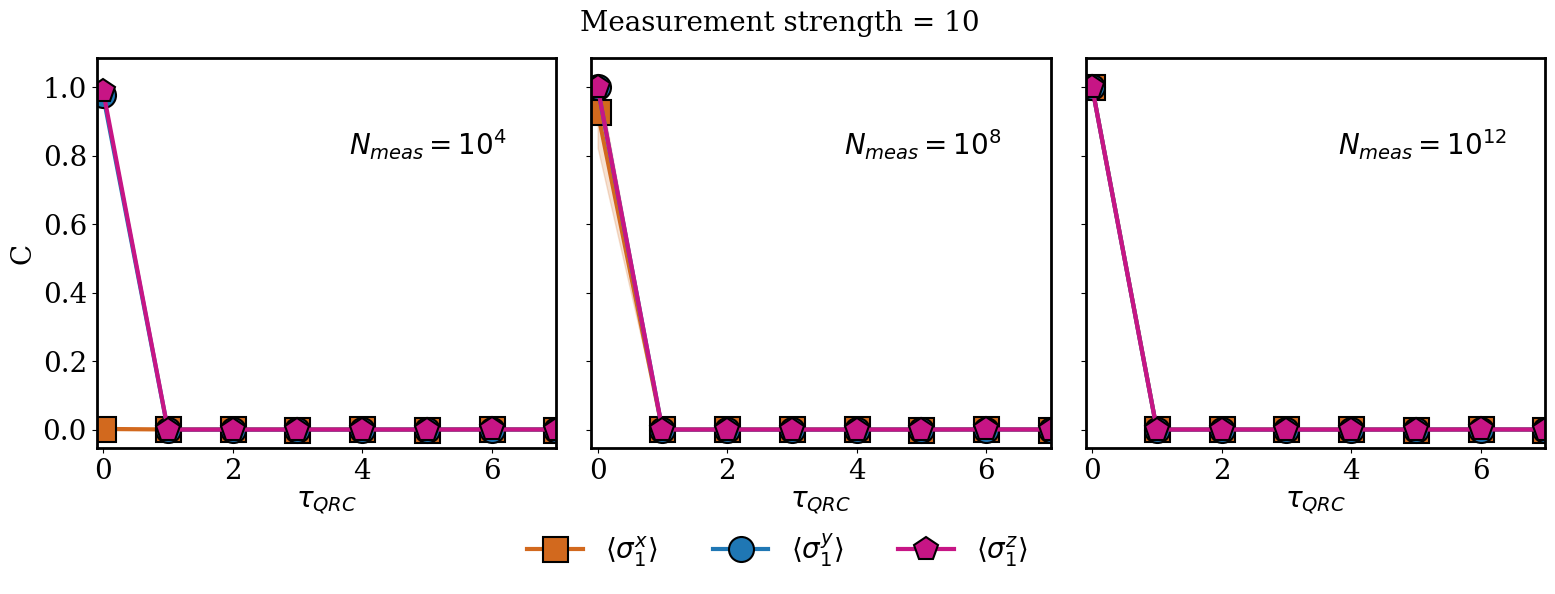

In [19]:
plot_single_axis_dependence_Nmeas_sweep(L=9, h=3, W=0.01, Vmp=10, Dmp=1, N_rep=1, dt=5, Js=1, legend=True, N_meas=[int(1e4), int(1e8), int(1e12)], MeasStr=10, axis1='x')

In [23]:
def Nmeas_dependence(L=9, h=3, W=0.01, Vmp=10, Dmp=1, N_rep=1, dt=5, Js=1, inp_type='qubit',
								axis1='x', legend=True, N_meas=None, MeasStr=[]):
	
	fig, (ax, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 8), gridspec_kw={'width_ratios': [10, 1]})
	fig.subplots_adjust(hspace=0.05)  # adjust space between Axes

	dic ={
	'z': qutip.sigmaz(),
	'x': qutip.sigmax(),
	'y': qutip.sigmay(),
	}
	colors = ['goldenrod', 'tomato', 'deepskyblue', 'C2']
	markers = ['s', 'o', 'p', '^']

	N_meas = [int(n) for n in N_meas]
		
	for idx2, MeasStr in enumerate(MeasStr):

		C_mean_Meas = []
		C_std_Meas = []

		for p, g in enumerate(N_meas):

			if g is None:
				g = 'Inf'

			path = f'back_action/x/Qinp/QPreprocess/{inp_type}/N_meas{g}/Capacity_L{L}_Js{Js}_V{Vmp}_D{Dmp}_Nrep{N_rep}_h{h}_W{W}_dt{dt}_ax_{axis1}_sweep_delay_MeasStr{MeasStr}.npz'
			data = load_data(path)
			
			C_mean_store = []
			C_std_store = []
			
			for axis2 in ['x', 'y', 'z']:
				C = data[f'C_mean {axis2}']
				Cstd = data[f'C_std {axis2}']
				C = C[~np.isnan(C)]
				Cstd = Cstd[~np.isnan(Cstd)]

				C_mean_store.append(C)
				C_std_store.append(Cstd)

			C_mean_Meas.append(np.sum(C_mean_store))
			C_std_Meas.append(np.sum(C_std_store))

		C_mean_Meas = np.array(C_mean_Meas)

		ax.plot(
					N_meas,
					C_mean_Meas,
					marker=markers[idx2],
					markersize=18,
					color=colors[idx2],
					markeredgecolor='black',
					markeredgewidth=1.5
				)
		ax.fill_between(N_meas, C_mean_Meas - C_std_Meas, C_mean_Meas + C_std_Meas, alpha=0.3, color=colors[idx2])

		
		path = f'back_action/x/Qinp/QPreprocess/{inp_type}/N_measInf/Capacity_L{L}_Js{Js}_V{Vmp}_D{Dmp}_Nrep{N_rep}_h{h}_W{W}_dt{dt}_ax_{axis1}_sweep_delay_MeasStr{MeasStr}.npz'
		data = load_data(path)
		C_mean_store = []
		C_std_store = []
			
		for axis2 in ['x', 'y', 'z']:
			C = data[f'C_mean {axis2}']
			Cstd = data[f'C_std {axis2}']
			C = C[~np.isnan(C)]
			Cstd = Cstd[~np.isnan(Cstd)]

			C_mean_store.append(C)
			C_std_store.append(Cstd)

		C_mean_inf = [np.sum(C_mean_store)]
		C_std_inf = [np.sum(C_std_store)]

		ax2.plot([10], C_mean_inf, marker=markers[idx2],
					markersize=18,
					color=colors[idx2],
					markeredgecolor='black',
					markeredgewidth=1.5,
					label=f'g = {MeasStr}')
		
	path = f'Qinp/QPreprocess/{inp_type}/Capacity_L{L}_Js{Js}_V{Vmp}_D{Dmp}_Nrep{N_rep}_h{h}_W{W}_dt{dt}_ax_{axis1}_sweep_delay.npz'
	data = load_data(path)
	C_mean_store = []
	C_std_store = []
			
	for axis2 in ['x', 'y', 'z']:
		C = data[f'C_mean {axis2}']
		Cstd = data[f'C_std {axis2}']
		C = C[~np.isnan(C)]
		Cstd = Cstd[~np.isnan(Cstd)]

		C_mean_store.append(C)
		C_std_store.append(Cstd)

	C_mean_inf = [np.sum(C_mean_store)]
	C_std_inf = [np.sum(C_std_store)]

	ax2.scatter([10], C_mean_inf, marker='X',
					s=18**2,
					color='k',
					edgecolor='black',
					linewidth=1.5,
					label='Ideal case',
					zorder=10
					)

	ax.spines['right'].set_visible(False)
	ax2.spines['left'].set_visible(False)
	ax.yaxis.tick_left()
	ax.tick_params(labelright=False)
	ax2.yaxis.tick_right()

	# Set only ∞ for the second axis
	ax2.set_xticks([10])
	ax2.set_xticklabels([r'$\infty$'])

	# Add slashes to indicate the break
	d = .015
	kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
	ax.plot((1 - d/10, 1 + d/10), (-d, +d), **kwargs)
	ax.plot((1 - d/10, 1 + d/10), (1 - d, 1 + d), **kwargs)

	kwargs.update(transform=ax2.transAxes)
	ax2.plot((-d, +d), (-d, +d), **kwargs)
	ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)

	# Labels
	ax.set_xlabel(r'$\log_{10} N_s$')
	ax2.set_xlabel('')
	ax.set_xlabel(r'$N_{{meas}}$')
	ax.set_ylabel(r'$C_\sum$')
	ax.set_xscale('log')
	ax.axvline(1e4, ls='--', color='grey', zorder=0)
	ax.axvline(1e8, ls='--', color='grey', zorder=0)
	ax.axvline(1e12, ls='--', color='grey', zorder=0)
	fig.legend(loc=(0.25, 0.6), fancybox=True, framealpha=1,edgecolor='k')
	plt.tight_layout()
	plt.show()
	

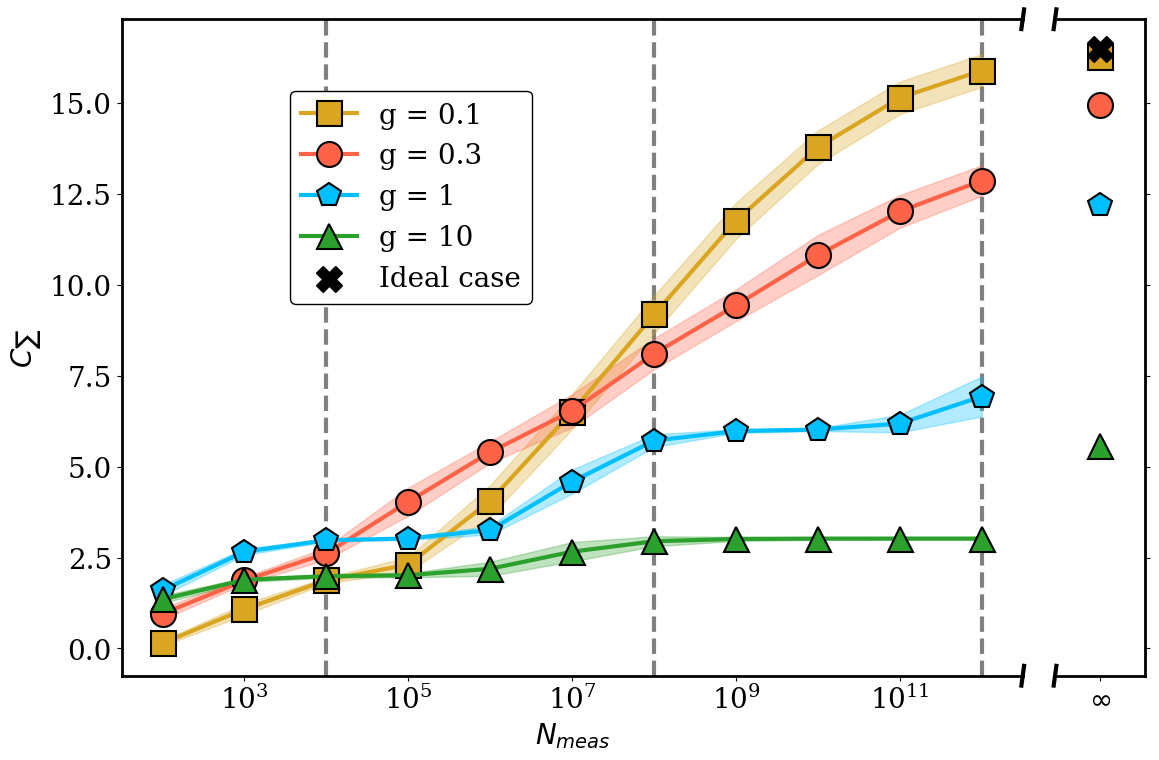

In [24]:
Nmeas_dependence(N_meas=[1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12], MeasStr=[0.1, 0.3, 1, 10])

In [187]:
from matplotlib import ticker

def g_plot_comparison(L, Js, h, W, Nesn, g,l, pm, task_name, delay_qrc, 
					   inp_type, Dmp=1, N_rep=1, Vmp=10, dt=5, ax='x', Nmeas=int(1e6), MeasStr_list=[0.1,0.3,1]):
	
	fig = plt.figure(figsize=(10,5))
	spec = gridspec.GridSpec(nrows=1, ncols=1)

	ax0 = fig.add_subplot(spec[0, 0])
	axes = [ax0]

	colors = ['goldenrod', 'tomato', 'deepskyblue', 'C2']
	markers = ['s', 'o', 'p', '^']

	path = (f'Qinp/{task_name}/HYB/{inp_type}/{pm}_L{L}_Js{Js}_V{Vmp}_D{Dmp}'
					f'_Nrep{N_rep}_h{h}_W{W}_dt{dt}_ax_{ax}_cax_{ax}_Nesn{Nesn}'
					f'_g{g}_l{l}_delayqrc{delay_qrc}_sweep_delay.npz')
	data = load_data(path_to_file=path)
	delays = data['delays']
	C_mean = data[f'C_mean {task_name}']
	C_std = data[f'C_std {task_name}']
	if pm == 'Fidelity':
		C_mean = 1 - C_mean
	ax0.plot(delays, C_mean, color='k', linestyle='--', label=r'$g=0,\,N_{{meas}}=\infty$')

	for i, MS in enumerate(MeasStr_list):
		
		path = (f'back_action/{ax}/Qinp/{task_name}/HYB/{inp_type}/N_meas{Nmeas}/{pm}_L{L}_Js{Js}_V{Vmp}_D{Dmp}'
				f'_Nrep{N_rep}_h{h}_W{W}_dt{dt}_ax_{ax}_cax_{ax}_Nesn{Nesn}'
				f'_g{g}_l{l}_delayqrc{delay_qrc}_sweep_delay_MeasStr{MS}.npz')
		data = load_data(path_to_file=path)
		delays = data['delays']
		C_mean = data[f'C_mean {task_name}']
		C_std = data[f'C_std {task_name}']
		if pm == 'Fidelity':
			C_mean = 1 - C_mean
		lab = fr'$g={MS},\,N_{{meas}}=10^{{{int(np.log10(Nmeas))}}}$' if Nmeas != 'Inf' else fr'$g={MS},\,N_{{meas}}=\infty$'
		ax0.plot(delays, C_mean, marker=markers[i], markersize=16, color=colors[i], markeredgecolor='k', label=lab)
		ax0.fill_between(delays, C_mean-C_std, C_mean+C_std, alpha=0.3, color=colors[i])

	for ax in axes:
		ax.set_yscale('log')
		if task_name == 'Tracerho2':
			ax.set_xlim(-0.2, 3)
		else:
			ax.set_xlim(-0.2, 20)
		ax.set_xlabel(r'$\tau$')

	if pm == 'NMSE':
		ylab = pm
	elif task_name == 'Fidelity':
		ylab = '1-F'    

	ax0.legend(loc='best', frameon=False, fontsize=16)
	ax0.set_ylabel(ylab)
	ax0.xaxis.set_major_locator(ticker.FixedLocator([0,1,2,3]))
	# ax1.set_ylim(1e-34,1)
	plt.tight_layout()
	plt.show()


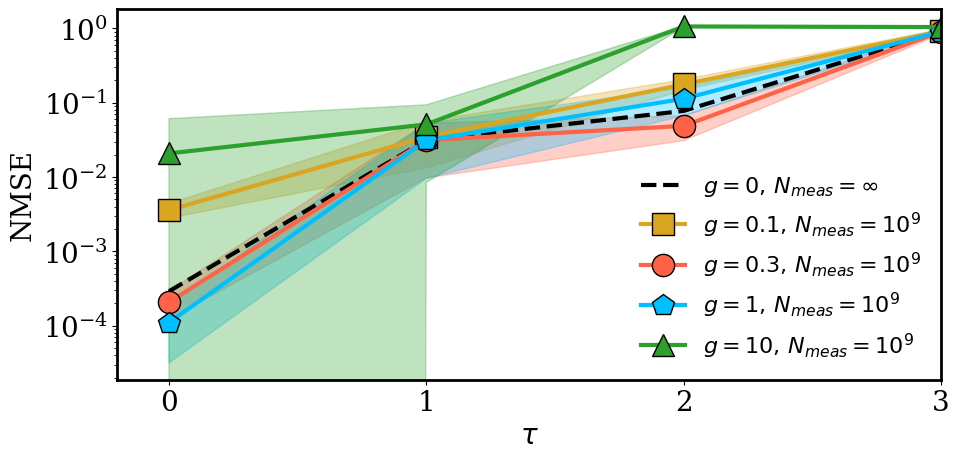

In [188]:
g_plot_comparison(L=9, Js=1, h=3, W=0.01,
                   Nesn=45, g=0.25, l=0.001,
                   pm='NMSE', task_name='Tracerho2',
                   delay_qrc=0.5, inp_type='qubit', Nmeas=int(1e9), MeasStr_list=[0.1,0.3,1,10])

In [209]:
def obs_dynamics_comparison(L, Js, h, W, Vmp, task_name, dt=10, L_max=1, MeasStr=0.1):

	# Import Data
	path = f'{task_name}/QRC/qubit/L{L}_Js{Js}_h{h}_W{W}_dt{dt}_V{Vmp}_D1_Nrep1/Iter_0.npz'
	# path = f'back_action/x/{task_name}/QRC/qubit/L{L}_Js{Js}_h{h}_W{W}_dt{dt}_V{Vmp}_D1_Nrep1_MeasStr_0.1/Iter_0.npz'
	data = load_data(path)

	obs = data['obs']

	t_length = obs.shape[0]

	n_obs = 3 * L # 3 because of 3 axis 'z', 'x', 'y' (It is important that the data must contain the three axis)
	loc_obs_ordered = np.full((n_obs, t_length * Vmp), fill_value=np.nan)

	for n in range(3):
		for i in range(t_length):
			for d in range(Vmp):
				for q in range(L):
					target_index = i * Vmp + (d)
					source_index = L * (n * Vmp + d) + q
					loc_obs_ordered[n*L + q, target_index] = obs[i, source_index]

	# Import Data
	path = f'back_action/x/{task_name}/QRC/qubit/L{L}_Js{Js}_h{h}_W{W}_dt{dt}_V{Vmp}_D1_Nrep1_MeasStr_{MeasStr}/Iter_0.npz'
	data = load_data(path)

	obs = data['obs']
	inp = data['inp']

	t_length = obs.shape[0]

	n_obs = 3 * L # 3 because of 3 axis 'z', 'x', 'y' (It is important that the data must contain the three axis)
	noisy_loc_obs_ordered = np.full((n_obs, t_length * Vmp), fill_value=np.nan)

	for n in range(1):
		for i in range(t_length):
			for d in range(Vmp):
				for q in range(L):
					target_index = i * Vmp + (d)
					source_index = L * (n * Vmp + d) + q
					noisy_loc_obs_ordered[n*L + q, target_index] = obs[i, source_index]

	t_mp = np.arange(t_length, step=dt/Vmp)
	t_inj = np.arange(t_length, step=dt)

	idx_min = 310
	idx_max = 355

	fig, ax = plt.subplots(figsize=(12,4))
	sx_inp = [qutip.expect(qutip.sigmax(), i) for i in inp]

	bas = L
	i = L_max-1
	# ax.scatter(t_inj[idx_min:idx_max+1], sx_inp[idx_min:idx_max+1],color='k', marker='x', s=8**2) # Input signal
	
	ax.plot(t_mp[idx_min*Vmp:idx_max*Vmp+1], loc_obs_ordered[bas + i,idx_min*Vmp:idx_max*Vmp+1], marker='s', markeredgecolor='k', markersize=8) # Sigma z dynamics (reescaled (1+x)/2)
	ax.plot(t_mp[idx_min*Vmp:idx_max*Vmp+1], noisy_loc_obs_ordered[i,idx_min*Vmp:idx_max*Vmp+1], marker='o', markeredgecolor='k', markersize=8) # Sigma z dynamics (reescaled (1+x)/2)

	ax.set_xlabel(r'$J_st$')
	ax.set_ylabel(fr'$\langle \sigma_{L_max}^x \rangle$')
	ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

	loc1 = 0.85; loc2 = 0.1; text = f'g = {MeasStr}' 
	ax.text(loc1, loc2, text, transform=ax.transAxes)

	plt.show()

	return

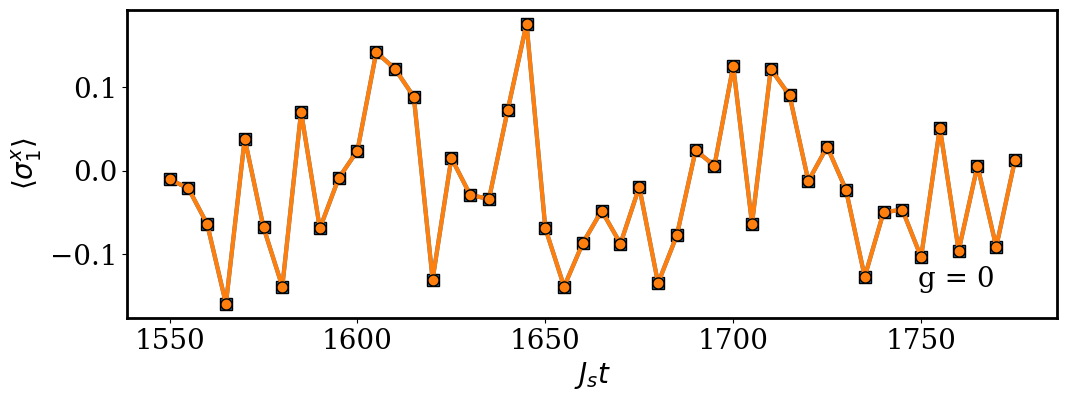

In [251]:
obs_dynamics_comparison(L=5, Js=1, h=3, W=0.01, Vmp=1, task_name='Qinp', dt=5, L_max=1, MeasStr=0)

In [177]:
def corr_dynamics_comparison(L, Js, h, W, Vmp, task_name, dt=10, L_max=1, MeasStr=0.1):

	# Import Data
	path = f'{task_name}/QRC/qubit/L{L}_Js{Js}_h{h}_W{W}_dt{dt}_V{Vmp}_D1_Nrep1/Iter_0.npz'
	# path = f'back_action/x/{task_name}/QRC/qubit/L{L}_Js{Js}_h{h}_W{W}_dt{dt}_V{Vmp}_D1_Nrep1_MeasStr_0.1/Iter_0.npz'
	data = load_data(path)

	obs = data['obs']

	t_length = obs.shape[0]
	Lc = np.sum(range(L))

	n_obs = 3 * Lc # 3 because of 3 axis 'z', 'x', 'y' (It is important that the data must contain the three axis)
	loc_obs_ordered = np.full((n_obs, t_length * Vmp), fill_value=np.nan)

	for n in range(3):
		for i in range(t_length):
			for d in range(Vmp):
				for q in range(Lc):
					target_index = i * Vmp + (d)
					source_index = Lc * (n * Vmp + d) + q + 3*L*Vmp
					loc_obs_ordered[n*Lc + q, target_index] = obs[i, source_index]

	# Import Data
	path = f'back_action/x/{task_name}/QRC/qubit/L{L}_Js{Js}_h{h}_W{W}_dt{dt}_V{Vmp}_D1_Nrep1_MeasStr_{MeasStr}/Iter_0.npz'
	data = load_data(path)

	obs = data['obs']
	inp = data['inp']

	t_length = obs.shape[0]

	n_obs = 3 * Lc # 3 because of 3 axis 'z', 'x', 'y' (It is important that the data must contain the three axis)
	noisy_loc_obs_ordered = np.full((n_obs, t_length * Vmp), fill_value=np.nan)

	for n in range(1):
		for i in range(t_length):
			for d in range(Vmp):
				for q in range(Lc):
					target_index = i * Vmp + (d)
					source_index = Lc * (n * Vmp + d) + q + L*Vmp
					# print(source_index)
					noisy_loc_obs_ordered[n*Lc + q, target_index] = obs[i, source_index]

	t_mp = np.arange(t_length, step=dt/Vmp)
	t_inj = np.arange(t_length, step=dt)

	idx_min = 310
	idx_max = 315

	fig, ax = plt.subplots(figsize=(12,4))
	sx_inp = [qutip.expect(qutip.sigmax(), i) for i in inp]

	bas = Lc
	i = L_max-1
	# ax.scatter(t_inj[idx_min:idx_max+1], sx_inp[idx_min:idx_max+1],color='k', marker='x', s=8**2) # Input signal
	
	ax.plot(t_mp[idx_min*Vmp:idx_max*Vmp+1], loc_obs_ordered[bas + i,idx_min*Vmp:idx_max*Vmp+1], marker='s', markeredgecolor='k', markersize=8) # Sigma z dynamics (reescaled (1+x)/2)
	ax.plot(t_mp[idx_min*Vmp:idx_max*Vmp+1], noisy_loc_obs_ordered[i,idx_min*Vmp:idx_max*Vmp+1], marker='o', markeredgecolor='k', markersize=8) # Sigma z dynamics (reescaled (1+x)/2)

	ax.set_xlabel(r'$J_st$')
	ax.set_ylabel(fr'$\langle \sigma_{L_max}^x \sigma_{L_max+1}^x\rangle$')
	ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

	loc1 = 0.85; loc2 = 0.7; text = f'g = {MeasStr}' 
	ax.text(loc1, loc2, text, transform=ax.transAxes)

	plt.show()

	return

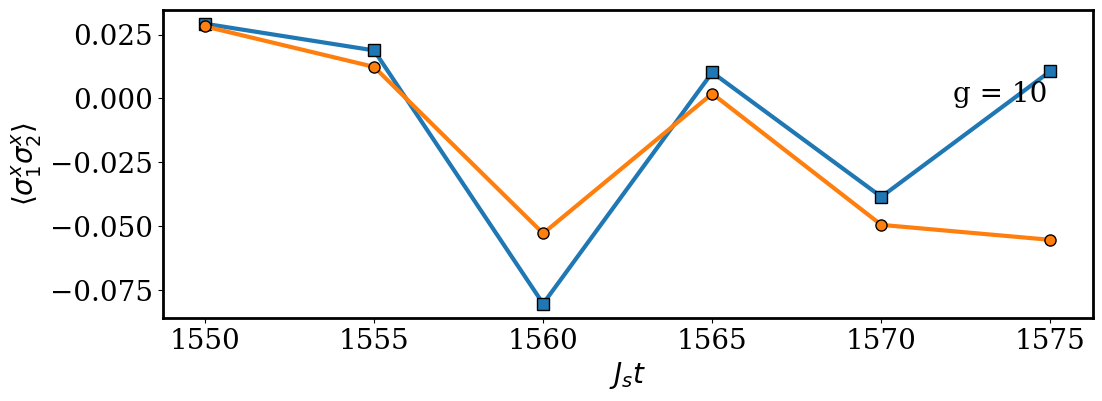

In [247]:
corr_dynamics_comparison(L=5, Js=1, h=3, W=0.01, Vmp=1, task_name='Qinp', dt=5, L_max=1, MeasStr=10)

In [218]:
from qutip import *

meas_strength = 100

sup = np.exp(-meas_strength**2/2)
M_qubit = np.array([[1, sup], [sup, 1]])
QM_qubit = Qobj(M_qubit)
QM = tensor(QM_qubit for _ in range(L))
M = QM.full()
M

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [235]:
rho = rand_dm(2)
rho

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.52715004+0.j        -0.11802655+0.2049786j]
 [-0.11802655-0.2049786j  0.47284996+0.j       ]]

In [236]:
expect(sigmax(), rho)

-0.23605310446936775

In [237]:
rhotx = gates.snot() * rho * gates.snot()
rho_ba = Qobj(np.multiply(M,rhotx.full()), dims=rho.dims)
rho_ba

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.38197345 0.        ]
 [0.         0.61802655]]

In [240]:
rho_ba = gates.snot() * rho_ba * gates.snot()
expect(sigmax(), rho_ba)

-0.23605310446936792

In [241]:
rho_ba

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.5        -0.11802655]
 [-0.11802655  0.5       ]]